# Movies Gross Earnings Correlation Project

#importing the libraries

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
from numpy.random import randn
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,8) #Adjusts the configuration of the plots we will create

#Read in the data

df = pd.read_csv(r'C:\Users\PhuM14335\OneDrive - PhuM\Documents\input\imdb-movies\movies.csv')

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


In [4]:
# Any missing data?

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
df2 = df.dropna()

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5421 entries, 0 to 7652
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      5421 non-null   object 
 1   rating    5421 non-null   object 
 2   genre     5421 non-null   object 
 3   year      5421 non-null   int64  
 4   released  5421 non-null   object 
 5   score     5421 non-null   float64
 6   votes     5421 non-null   float64
 7   director  5421 non-null   object 
 8   writer    5421 non-null   object 
 9   star      5421 non-null   object 
 10  country   5421 non-null   object 
 11  budget    5421 non-null   float64
 12  gross     5421 non-null   float64
 13  company   5421 non-null   object 
 14  runtime   5421 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 677.6+ KB


In [7]:
# Look at datatypes in columns

df2.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [8]:
df2= df2.astype({'gross': np.int64, 'budget': np.int64, 'votes': np.int64})

In [9]:
# Order the data by gross revenue
df2 = df2.sort_values(by=['gross'], ascending=False)
df2

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0


In [10]:
# Drop duplicates
df2.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5640,Tanner Hall,R,Drama,2009,"January 15, 2015 (Sweden)",5.8,3500,Francesca Gregorini,Tatiana von Fürstenberg,Rooney Mara,United States,3000000,5073,Two Prong Lesson,96.0
2434,Philadelphia Experiment II,PG-13,Action,1993,"June 4, 1994 (South Korea)",4.5,1900,Stephen Cornwell,Wallace C. Bennett,Brad Johnson,United States,5000000,2970,Trimark Pictures,97.0
3681,Ginger Snaps,Not Rated,Drama,2000,"May 11, 2001 (Canada)",6.8,43000,John Fawcett,Karen Walton,Emily Perkins,Canada,5000000,2554,Copperheart Entertainment,108.0
272,Parasite,R,Horror,1982,"March 12, 1982 (United States)",3.9,2300,Charles Band,Alan J. Adler,Robert Glaudini,United States,800000,2270,Embassy Pictures,85.0



#Numerizing variables - Assigning whole numbers to represent the different age ratings 


In [13]:
rating = np.array(['Not Rated','G', 'PG', 'PG-13', 'R', 'X'])
num = np.arange(0,len(rating))
codes = dict(zip(rating, num))
df2['rating_num'] = df2['rating_num'].map(codes)
unique, counts = np.unique(df2['rating_num'], return_counts=True)
dict(zip(unique, counts))

{0: 61, 1: 112, 2: 907, 3: 1729, 4: 2597, 5: 15}

In [ ]:
#in the script above , The codes will be integer values between 0 and 5. They will be assigned in order of increasing age limit. For example: 1 = "G", 2 = "PG", 5 = "X" etc. 0 will be assigned to "Not Rated".


#Regression plots of gross revenues in comparison to all other numeric factors to see if there are are any relationships.

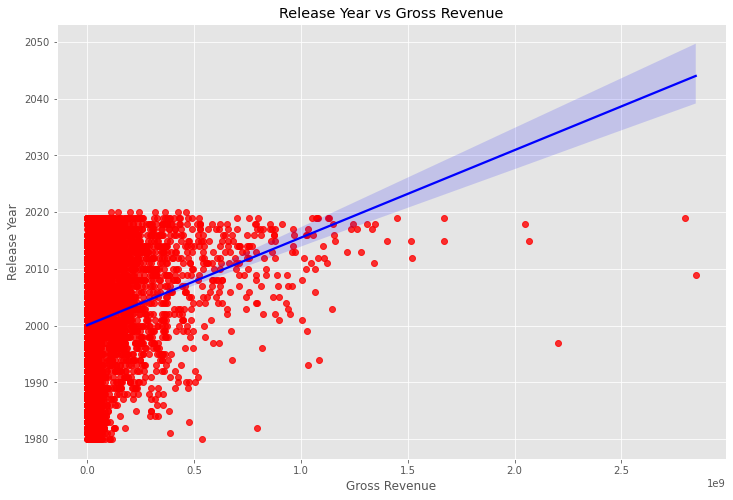

In [14]:
sns.regplot(x='gross',y='year',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Release Year vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Release Year')
plt.show()

In [ ]:
#On visual inspection of the graph above, there appears to be no obvious linear relationship between movie release year and gross revenue. Gross revenue does seem to be rising in recent years, but there is no clear pattern.

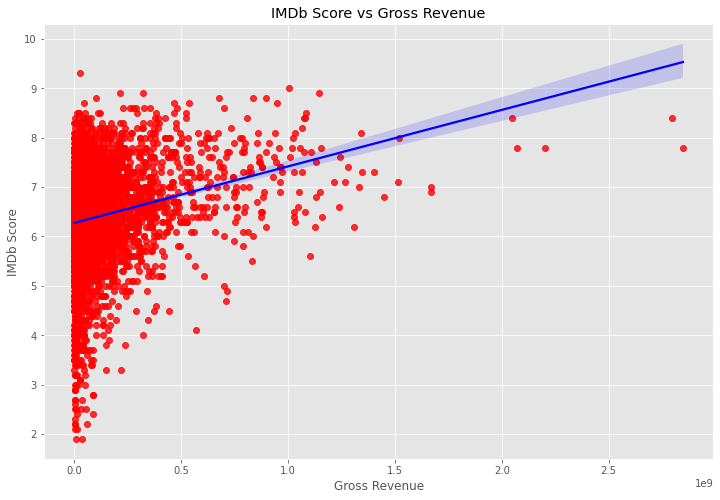

In [15]:
# Regression plot
sns.regplot(x='gross',y='score',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('IMDb Score vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('IMDb Score')
plt.show()

In [ ]:
#There doesn't seem to be a particularly strong linear relationship between user score on IMDb and the gross revenue of a movie. Again, a small rise in gross revenue with user score.

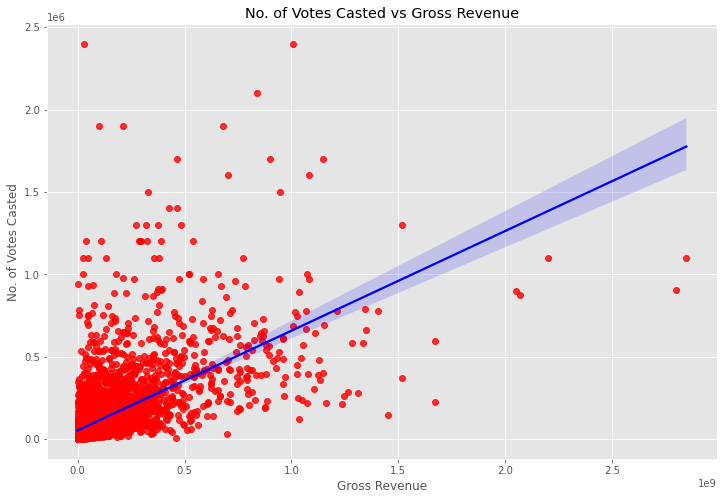

In [16]:
sns.regplot(x='gross',y='votes',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('No. of Votes Casted vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('No. of Votes Casted')
plt.show()

In [ ]:
#There seems to be some sort of linear relationship between the number of votes casted on a movie and it's gross revenue. The relationship is relatively strong

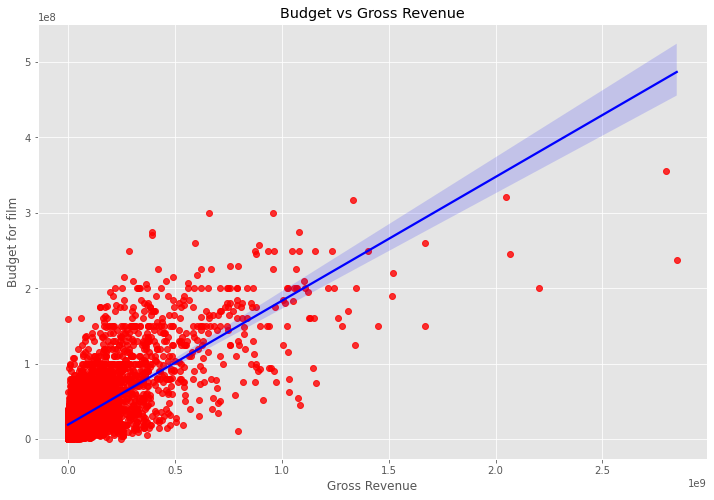

In [17]:
sns.regplot(x='gross',y='budget',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Budget vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget for film')
plt.show()

In [ ]:
#Possibly the strongest and clearest relationship with the gross revenue. There are few outliers and the spread is much smaller compared to that of the graph of votes vs gross revenue.

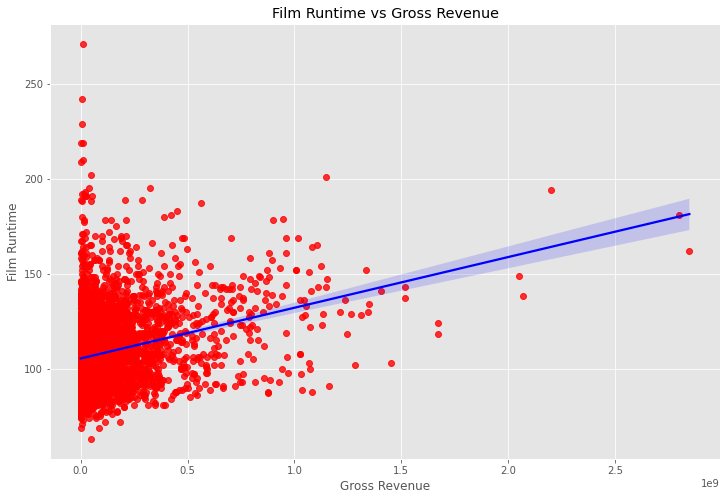

In [18]:
sns.regplot(x='gross',y='runtime',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Film Runtime vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Film Runtime')
plt.show()

In [ ]:
#A slightly stronger linear relationship than that of release year and score, but it is not significant either.

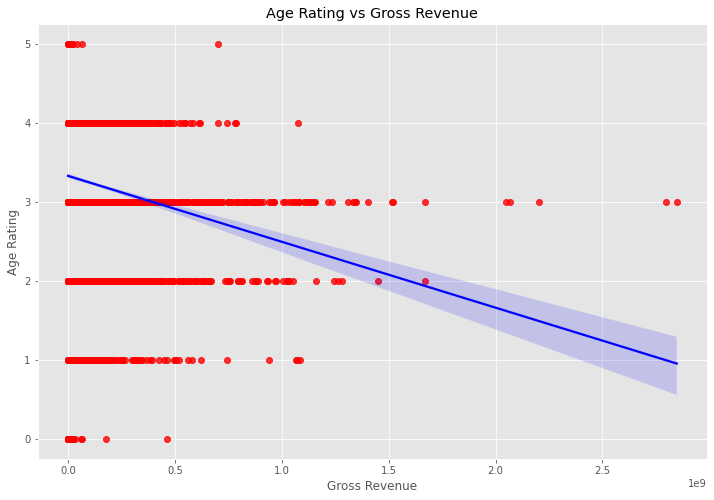

In [19]:
sns.regplot(x='gross',y='rating_num',data=df2, scatter_kws={"color":"red"}, line_kws={"color":"blue"})
plt.title('Age Rating vs Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Age Rating')
plt.show()

In [ ]:
#Finally, age rating has a very weak relationship with gross revenue too.